## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_l1_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 40
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results_l1 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results_l1[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updati

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 9s 180us/step - loss: 6.0024 - acc: 0.2707 - val_loss: 5.8111 - val_acc: 0.3450
Epoch 2/40
50000/50000 [==============================] - 9s 172us/step - loss: 5.7177 - acc: 0.3660 - val_loss: 5.6413 - val_acc: 0.3785
Epoch 3/40
50000/50000 [==============================] - 9s 178us/step - loss: 5.5640 - acc: 0.3993 - val_loss: 5.5092 - val_acc: 0.4040
Epoch 4/40
50000/50000 [==============================] - 9s 190us/step - loss: 5.4424 - acc: 0.4188 - val_loss: 5.3873 - val_acc: 0.4284
Epoch 5/40
50000/50000 [==============================] - 9s 175us/step - loss: 5.3320 - acc: 0.4362 - val_loss: 5.2847 - val_acc: 0.4392
Epoch 6/40
50000/50000 [==============================] - 9s 184us/step - loss: 5.2310 - acc: 0.4511 - val_loss: 5.1920 - val_acc: 0.4505
Epoch 7/40
50000/50000 [==============================] - 9s 189us/step - loss: 5.1380 - acc: 0.4621 - val_loss: 5.1136 - 

50000/50000 [==============================] - 12s 238us/step - loss: 1.4288 - acc: 0.4989 - val_loss: 1.4694 - val_acc: 0.4767
Epoch 12/40
50000/50000 [==============================] - 9s 182us/step - loss: 1.4053 - acc: 0.5057 - val_loss: 1.4739 - val_acc: 0.4756
Epoch 13/40
50000/50000 [==============================] - 9s 182us/step - loss: 1.3853 - acc: 0.5128 - val_loss: 1.4506 - val_acc: 0.4849
Epoch 14/40
50000/50000 [==============================] - 10s 205us/step - loss: 1.3665 - acc: 0.5222 - val_loss: 1.4413 - val_acc: 0.4890
Epoch 15/40
50000/50000 [==============================] - 11s 217us/step - loss: 1.3477 - acc: 0.5273 - val_loss: 1.4258 - val_acc: 0.4940
Epoch 16/40
50000/50000 [==============================] - 11s 213us/step - loss: 1.3293 - acc: 0.5343 - val_loss: 1.4053 - val_acc: 0.5029
Epoch 17/40
50000/50000 [==============================] - 10s 201us/step - loss: 1.3121 - acc: 0.5395 - val_loss: 1.4231 - val_acc: 0.4971
Epoch 18/40
50000/50000 [=========

50000/50000 [==============================] - 9s 189us/step - loss: 1.2534 - acc: 0.5582 - val_loss: 1.3891 - val_acc: 0.5043
Epoch 22/40
50000/50000 [==============================] - 9s 188us/step - loss: 1.2355 - acc: 0.5653 - val_loss: 1.3606 - val_acc: 0.5167
Epoch 23/40
50000/50000 [==============================] - 9s 189us/step - loss: 1.2193 - acc: 0.5706 - val_loss: 1.3563 - val_acc: 0.5104
Epoch 24/40
50000/50000 [==============================] - 10s 191us/step - loss: 1.2061 - acc: 0.5732 - val_loss: 1.4141 - val_acc: 0.4995
Epoch 25/40
50000/50000 [==============================] - 10s 196us/step - loss: 1.1914 - acc: 0.5816 - val_loss: 1.3655 - val_acc: 0.5151
Epoch 26/40
50000/50000 [==============================] - 9s 187us/step - loss: 1.1755 - acc: 0.5865 - val_loss: 1.3535 - val_acc: 0.5223
Epoch 27/40
50000/50000 [==============================] - 9s 185us/step - loss: 1.1606 - acc: 0.5926 - val_loss: 1.3680 - val_acc: 0.5152
Epoch 28/40
50000/50000 [============

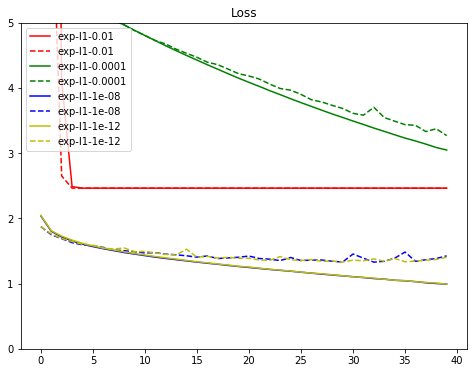

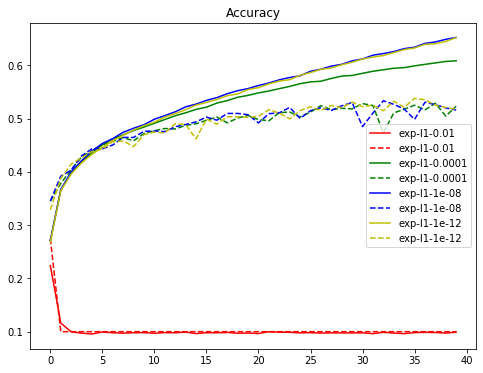

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train-loss'])),results_l1[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid-loss'])),results_l1[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train-acc'])),results_l1[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid-acc'])),results_l1[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [14]:
results_l1_l2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio_1 in L1_EXP:
    for regulizer_ratio_2 in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        #print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
        model = build_mlp_l1_l2(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio_1, l2_ratio=regulizer_ratio_2)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-l1-%s-l2-%s" % (str(regulizer_ratio_1),str(regulizer_ratio_2))
        results_l1_l2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 9s 172us/step - loss: 19

50000/50000 [==============================] - 9s 180us/step - loss: 2.4854 - acc: 0.1000 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 5/40
50000/50000 [==============================] - 9s 177us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/40
50000/50000 [==============================] - 9s 178us/step - loss: 2.4626 - acc: 0.0988 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 7/40
50000/50000 [==============================] - 8s 169us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 8/40
50000/50000 [==============================] - 8s 163us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 9/40
50000/50000 [==============================] - 8s 166us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 10/40
50000/50000 [==============================] - 8s 170us/step - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 11/40
50000/50000 [===================

50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 16/40
50000/50000 [==============================] - 9s 179us/step - loss: 2.4626 - acc: 0.0976 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 17/40
50000/50000 [==============================] - 9s 182us/step - loss: 2.4626 - acc: 0.0979 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 18/40
50000/50000 [==============================] - 9s 179us/step - loss: 2.4626 - acc: 0.0982 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 19/40
50000/50000 [==============================] - 9s 178us/step - loss: 2.4626 - acc: 0.0979 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 20/40
50000/50000 [==============================] - 9s 179us/step - loss: 2.4626 - acc: 0.0989 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 21/40
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - acc: 0.0970 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 22/40
50000/50000 [==============

50000/50000 [==============================] - 9s 178us/step - loss: 2.4626 - acc: 0.0959 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 27/40
50000/50000 [==============================] - 9s 179us/step - loss: 2.4626 - acc: 0.0976 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 28/40
50000/50000 [==============================] - 9s 173us/step - loss: 2.4626 - acc: 0.0995 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 29/40
50000/50000 [==============================] - 9s 177us/step - loss: 2.4626 - acc: 0.0991 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 30/40
50000/50000 [==============================] - 9s 175us/step - loss: 2.4626 - acc: 0.0989 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 31/40
50000/50000 [==============================] - 9s 173us/step - loss: 2.4626 - acc: 0.0956 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 32/40
50000/50000 [==============================] - 9s 175us/step - loss: 2.4626 - acc: 0.0955 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 33/40
50000/50000 [==============

50000/50000 [==============================] - 9s 180us/step - loss: 1.8201 - acc: 0.4648 - val_loss: 1.8366 - val_acc: 0.4601
Epoch 38/40
50000/50000 [==============================] - 9s 184us/step - loss: 1.8140 - acc: 0.4651 - val_loss: 1.8380 - val_acc: 0.4648
Epoch 39/40
50000/50000 [==============================] - 9s 180us/step - loss: 1.8055 - acc: 0.4677 - val_loss: 1.8404 - val_acc: 0.4408
Epoch 40/40
50000/50000 [==============================] - 9s 181us/step - loss: 1.8004 - acc: 0.4672 - val_loss: 1.8321 - val_acc: 0.4531
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               13132

50000/50000 [==============================] - 11s 216us/step - loss: 6.0261 - acc: 0.2630 - val_loss: 5.8163 - val_acc: 0.3417
Epoch 2/40
50000/50000 [==============================] - 15s 304us/step - loss: 5.7322 - acc: 0.3602 - val_loss: 5.6569 - val_acc: 0.3695
Epoch 3/40
50000/50000 [==============================] - 10s 205us/step - loss: 5.5849 - acc: 0.3890 - val_loss: 5.5198 - val_acc: 0.4040oss: 5.
Epoch 4/40
50000/50000 [==============================] - 10s 200us/step - loss: 5.4605 - acc: 0.4117 - val_loss: 5.4071 - val_acc: 0.4197
Epoch 5/40
50000/50000 [==============================] - 10s 204us/step - loss: 5.3505 - acc: 0.4281 - val_loss: 5.3114 - val_acc: 0.4289
Epoch 6/40
50000/50000 [==============================] - 9s 183us/step - loss: 5.2491 - acc: 0.4412 - val_loss: 5.2107 - val_acc: 0.4438
Epoch 7/40
50000/50000 [==============================] - 9s 187us/step - loss: 5.1529 - acc: 0.4536 - val_loss: 5.1197 - val_acc: 0.4537
Epoch 8/40
50000/50000 [=========

50000/50000 [==============================] - 9s 182us/step - loss: 4.7170 - acc: 0.5020 - val_loss: 4.7368 - val_acc: 0.4668
Epoch 13/40
50000/50000 [==============================] - 9s 179us/step - loss: 4.6384 - acc: 0.5083 - val_loss: 4.6741 - val_acc: 0.4875
Epoch 14/40
50000/50000 [==============================] - 9s 181us/step - loss: 4.5636 - acc: 0.5156 - val_loss: 4.5933 - val_acc: 0.4902
Epoch 15/40
50000/50000 [==============================] - 9s 181us/step - loss: 4.4901 - acc: 0.5213 - val_loss: 4.5135 - val_acc: 0.4930
Epoch 16/40
50000/50000 [==============================] - 9s 178us/step - loss: 4.4158 - acc: 0.5269 - val_loss: 4.4552 - val_acc: 0.5016
Epoch 17/40
50000/50000 [==============================] - 9s 179us/step - loss: 4.3465 - acc: 0.5315 - val_loss: 4.3911 - val_acc: 0.5034
Epoch 18/40
50000/50000 [==============================] - 9s 183us/step - loss: 4.2760 - acc: 0.5347 - val_loss: 4.3272 - val_acc: 0.5099
Epoch 19/40
50000/50000 [==============

50000/50000 [==============================] - 9s 177us/step - loss: 2.0945 - acc: 0.4840 - val_loss: 2.0888 - val_acc: 0.4722
Epoch 24/40
50000/50000 [==============================] - 9s 173us/step - loss: 2.0319 - acc: 0.4866 - val_loss: 2.0234 - val_acc: 0.4852
Epoch 25/40
50000/50000 [==============================] - 8s 169us/step - loss: 1.9778 - acc: 0.4878 - val_loss: 1.9857 - val_acc: 0.4754
Epoch 26/40
50000/50000 [==============================] - 9s 172us/step - loss: 1.9302 - acc: 0.4917 - val_loss: 1.9550 - val_acc: 0.4719
Epoch 27/40
50000/50000 [==============================] - 9s 176us/step - loss: 1.8885 - acc: 0.4949 - val_loss: 1.9337 - val_acc: 0.4725
Epoch 28/40
50000/50000 [==============================] - 9s 175us/step - loss: 1.8543 - acc: 0.4937 - val_loss: 1.8830 - val_acc: 0.4803
Epoch 29/40
50000/50000 [==============================] - 9s 178us/step - loss: 1.8236 - acc: 0.4964 - val_loss: 1.8579 - val_acc: 0.4821
Epoch 30/40
50000/50000 [==============

50000/50000 [==============================] - 9s 177us/step - loss: 1.2188 - acc: 0.6197 - val_loss: 1.5381 - val_acc: 0.5076
Epoch 35/40
50000/50000 [==============================] - 9s 179us/step - loss: 1.2101 - acc: 0.6232 - val_loss: 1.5481 - val_acc: 0.4984
Epoch 36/40
50000/50000 [==============================] - 9s 175us/step - loss: 1.1946 - acc: 0.6292 - val_loss: 1.5334 - val_acc: 0.5175
Epoch 37/40
50000/50000 [==============================] - 9s 170us/step - loss: 1.1822 - acc: 0.6333 - val_loss: 1.4615 - val_acc: 0.5400
Epoch 38/40
50000/50000 [==============================] - 8s 169us/step - loss: 1.1699 - acc: 0.6387 - val_loss: 1.4807 - val_acc: 0.5358
Epoch 39/40
50000/50000 [==============================] - 8s 166us/step - loss: 1.1589 - acc: 0.6437 - val_loss: 1.4985 - val_acc: 0.5256
Epoch 40/40
50000/50000 [==============================] - 8s 167us/step - loss: 1.1462 - acc: 0.6450 - val_loss: 1.5475 - val_acc: 0.5143
_______________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 9s 185us/step - loss: 2.0242 - acc: 0.2787 - val_loss: 1.8586 - val_acc: 0.3523
Epoch 2/40
50000/50000 [==============================] - 9s 174us/step - loss: 1.7980 - acc: 0.3712 - val_loss: 1.7464 - val_acc: 0.3905
Epoch 3/40
50000/50000 [==============================] - 9s 172us/step - loss: 1.7185 - acc: 0.4001 - val_loss: 1.6904 - val_acc: 0.4107
Epoch 4/40
50000/50000 [==============================] - 9s 174us/step - loss: 1.6612 - acc: 0.4192 - val_loss: 1.6485 - val_acc: 0.4191
Epoch 5/40
50000/50000 [==============================] - 9s 180us/step - loss: 1.6134 - acc: 0.4372 - val_loss: 1.6092 - val_acc: 0.4344
Epoch 6/40
50000/50000 [==============================] - 9s 176us/step - loss: 1.5742 - acc: 0.4505 - val_loss: 1.5717 - val_acc: 0.4510
Epoch 7/40
50000/50000 [==============================] - 9s 179us/step - loss: 1.5403 - acc: 0.4615 - val_loss: 1.5537 - 

50000/50000 [==============================] - 9s 179us/step - loss: 4.0509 - acc: 0.4513 - val_loss: 3.8770 - val_acc: 0.4482
Epoch 13/40
50000/50000 [==============================] - 9s 185us/step - loss: 3.7102 - acc: 0.4542 - val_loss: 3.5598 - val_acc: 0.4510
Epoch 14/40
50000/50000 [==============================] - 9s 182us/step - loss: 3.4170 - acc: 0.4547 - val_loss: 3.2977 - val_acc: 0.4514
Epoch 15/40
50000/50000 [==============================] - 9s 187us/step - loss: 3.1681 - acc: 0.4585 - val_loss: 3.0650 - val_acc: 0.4526
Epoch 16/40
50000/50000 [==============================] - 10s 198us/step - loss: 2.9546 - acc: 0.4646 - val_loss: 2.8636 - val_acc: 0.4611
Epoch 17/40
50000/50000 [==============================] - 9s 186us/step - loss: 2.7698 - acc: 0.4651 - val_loss: 2.7090 - val_acc: 0.4619
Epoch 18/40
50000/50000 [==============================] - 9s 188us/step - loss: 2.6133 - acc: 0.4682 - val_loss: 2.5515 - val_acc: 0.4640
Epoch 19/40
50000/50000 [=============

50000/50000 [==============================] - 9s 175us/step - loss: 1.3636 - acc: 0.5681 - val_loss: 1.5284 - val_acc: 0.5055
Epoch 24/40
50000/50000 [==============================] - 9s 179us/step - loss: 1.3511 - acc: 0.5728 - val_loss: 1.5192 - val_acc: 0.5094
Epoch 25/40
50000/50000 [==============================] - 9s 180us/step - loss: 1.3371 - acc: 0.5789 - val_loss: 1.5200 - val_acc: 0.5123
Epoch 26/40
50000/50000 [==============================] - 9s 183us/step - loss: 1.3218 - acc: 0.5842 - val_loss: 1.4981 - val_acc: 0.5177
Epoch 27/40
50000/50000 [==============================] - 9s 189us/step - loss: 1.3096 - acc: 0.5871 - val_loss: 1.5171 - val_acc: 0.5161
Epoch 28/40
50000/50000 [==============================] - 9s 187us/step - loss: 1.2959 - acc: 0.5932 - val_loss: 1.4838 - val_acc: 0.5239
Epoch 29/40
50000/50000 [==============================] - 9s 184us/step - loss: 1.2801 - acc: 0.5972 - val_loss: 1.5029 - val_acc: 0.5187
Epoch 30/40
50000/50000 [==============

50000/50000 [==============================] - 9s 172us/step - loss: 1.0527 - acc: 0.6301 - val_loss: 1.3270 - val_acc: 0.5343
Epoch 35/40
50000/50000 [==============================] - 9s 175us/step - loss: 1.0443 - acc: 0.6327 - val_loss: 1.3581 - val_acc: 0.5254
Epoch 36/40
50000/50000 [==============================] - 9s 182us/step - loss: 1.0310 - acc: 0.6377 - val_loss: 1.3196 - val_acc: 0.5358
Epoch 37/40
50000/50000 [==============================] - 9s 182us/step - loss: 1.0165 - acc: 0.6446 - val_loss: 1.3921 - val_acc: 0.5164
Epoch 38/40
50000/50000 [==============================] - 9s 181us/step - loss: 1.0056 - acc: 0.6462 - val_loss: 1.3610 - val_acc: 0.5292
Epoch 39/40
50000/50000 [==============================] - 9s 180us/step - loss: 0.9907 - acc: 0.6530 - val_loss: 1.3492 - val_acc: 0.5297
Epoch 40/40
50000/50000 [==============================] - 9s 185us/step - loss: 0.9794 - acc: 0.6554 - val_loss: 1.4096 - val_acc: 0.5249
_______________________________________

In [25]:
len(results_l1_l2.keys())

16

In [27]:
results_l1_l2[cond]['train-loss']

[2.018059711341858,
 1.7996138958358765,
 1.7111445090484618,
 1.649525086555481,
 1.6024196923065186,
 1.5632568886184692,
 1.531188539276123,
 1.5011748721313476,
 1.4743401385879518,
 1.4500311042022704,
 1.4270567875289917,
 1.4039902561950683,
 1.3824756010818482,
 1.3627952941894532,
 1.3444244318008423,
 1.3256687385177612,
 1.3074228467559814,
 1.2900356717300414,
 1.2723593737411498,
 1.2549460264587402,
 1.2406436837387085,
 1.2236760048294066,
 1.2080825397109984,
 1.192652198448181,
 1.181571057395935,
 1.1645460415649413,
 1.1533144900512695,
 1.1340920907592773,
 1.125056215209961,
 1.1067650268173217,
 1.094330741043091,
 1.0820448740005493,
 1.0681353740692139,
 1.0527329674720765,
 1.0442521855163573,
 1.0309830836868286,
 1.016512726459503,
 1.005646148033142,
 0.9907365662574769,
 0.979363977432251]

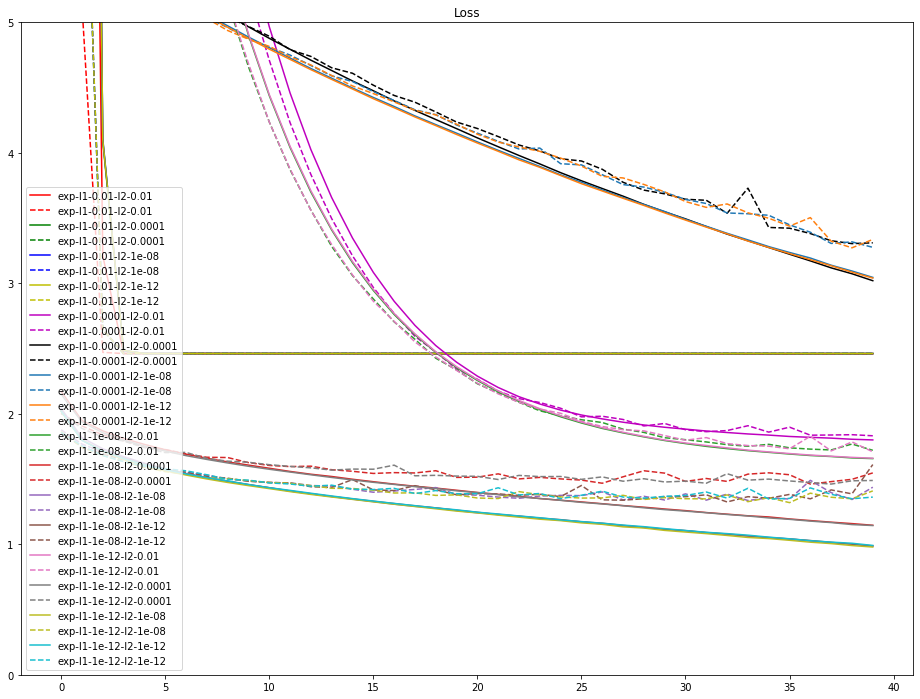

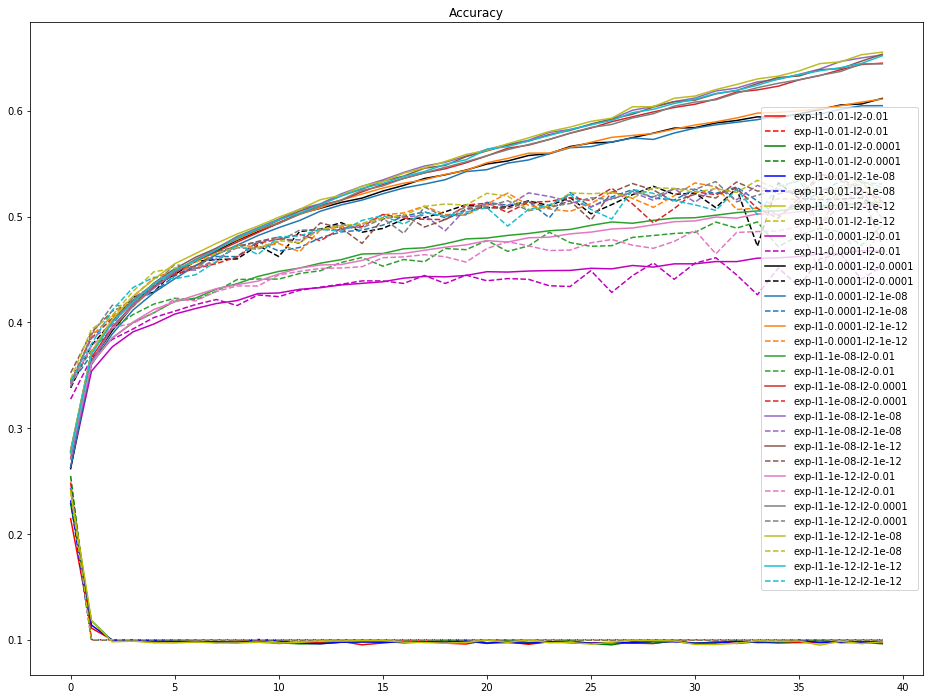

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8','C9']

plt.figure(figsize=(16,12))
for i, cond in enumerate(results_l1_l2.keys()):
    plt.plot(range(len(results_l1_l2[cond]['train-loss'])),results_l1_l2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1_l2[cond]['valid-loss'])),results_l1_l2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results_l1_l2.keys()):
    plt.plot(range(len(results_l1_l2[cond]['train-acc'])),results_l1_l2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1_l2[cond]['valid-acc'])),results_l1_l2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()